In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
CO_2018 = pd.read_excel('../data/raw/2018CO.xls')

In [3]:
CO_2018.shape

(8760, 33)

In [4]:
def int_to_hour(num):
    if num < 10:
        return '0{}:00:00'.format(num)
    else:
        return '{}:00:00'.format(num)

In [5]:
CO_2018['HORA'] = CO_2018['HORA'].apply(lambda x:int_to_hour(x-1))

In [6]:
CO_2018['DATETIME'] = pd.to_datetime(CO_2018['FECHA'].astype(str) +' ' + CO_2018['HORA'], format = '%Y-%m-%d %H:%M:%S')

In [7]:
CO_2018.set_index('DATETIME', inplace = True)

In [8]:
CO_2018 = CO_2018.drop(['FECHA','HORA'],axis = 1)

In [9]:
CO_2018.asfreq('D').head()

,ACO,AJM,ATI,BJU,CAM,CCA,CHO,CUA,CUT,FAC,...,SAG,SFE,SJA,TAH,TLA,TLI,UAX,UIZ,VIF,XAL
DATETIME,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0.4,0.8,0.8,0.6,-99.0,0.7,-99.0,0.5,-99,0.3,...,0.6,0.6,-99,1.5,0.4,1.1,-99.0,1.2,0.6,0.4
2018-01-02,0.2,0.4,0.1,0.3,-99.0,0.1,-99.0,0.1,-99,0.1,...,0.2,0.2,-99,0.1,0.0,0.2,-99.0,0.3,0.3,0.3
2018-01-03,0.6,0.3,0.4,0.9,-99.0,0.4,-99.0,0.1,-99,0.5,...,0.8,0.3,-99,0.6,0.6,0.9,-99.0,0.9,0.9,0.9
2018-01-04,0.2,0.3,0.2,0.7,-99.0,0.4,-99.0,0.2,-99,0.3,...,0.3,0.2,-99,0.4,0.1,0.5,-99.0,0.7,0.3,0.8
2018-01-05,0.3,0.3,0.3,1.0,-99.0,0.6,-99.0,0.2,-99,0.5,...,0.5,0.3,-99,0.6,0.4,1.0,-99.0,0.9,0.5,1.0


In [58]:
prueba = CO_2018['2018-01-01 00:00:00':'2018-01-02 23:00:00']

In [61]:
prueba.index.dayofweek

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1],
           dtype='int64', name='DATETIME')

In [11]:
#prueba.plot(subplots = True, layout = (31,1), sharex=True, sharey=False, legend=True)
#plt.tight_layout()
#plt.show()

In [12]:
#fig, ax = plt.subplots()
#ax.plot(CO_2018.index, CO_2018['ACO'])
#plt.show

In [13]:
prueba[prueba['ACO']==max(prueba['ACO'])].index.values

array(['2018-01-01T00:00:00.000000000', '2018-01-01T01:00:00.000000000',
       '2018-01-01T02:00:00.000000000', '2018-01-01T03:00:00.000000000',
       '2018-01-01T04:00:00.000000000', '2018-01-01T05:00:00.000000000',
       '2018-01-01T06:00:00.000000000'], dtype='datetime64[ns]')

In [47]:
CO_2018.index[0].hour

0

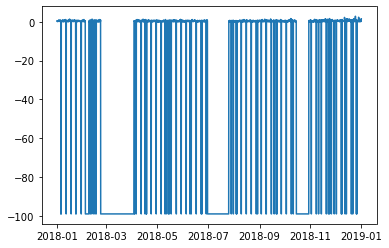

In [23]:
plt.plot(CO_2018.index,CO_2018['ACO'])

In [54]:
CO_2018.index.quarter

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
           dtype='int64', name='DATETIME', length=8760)

# Pasos a realizar:

1. Crear una función que separe en distintos rangos de tiempo a la serie
2. Crear gráficas lineales en los distintos rangos de tiempo
3. Analizar el momento de máxima emisión del contaminante
4. Averiguar cómo poner esta información en un mapa de la cdmx